# My Vivino Project

A wine quality prediction system which gives wine rating and quality

`Rating      Quality`

`0 to 4      Poor`

`5 to 6      Average`

`7 to 10     Excellent`

However for our problem, due to the number of our dataset, we will be using two rating systems, Good and Bad

`Rating      Quality`

`0 to 5      Bad`

`6 to 10     Good`

It uses regression algorithm to predict wine rating and then maps the output to give the quality


In [2]:
!pip install scikit-learn

     |████████████████████████████████| 22.2 MB 1.6 MB/s             
     |████████████████████████████████| 309 kB 44.8 MB/s            


# Import Required Library

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, mean_absolute_error, classification_report

# import regression model
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

# Data Collection and Cleaning

In [4]:
def quality(x):
    if int(x) < 6:
        return "Poor"
    else:
        return "Good"

## Load individual Wine type

In [5]:
#Load Red wine Dataset
df1 = pd.read_csv("winequality-red.csv", delimiter=";")

#Add Wine type column to dataset with 0 for red wine 
df1["wine_type"] = [int(x) for x in np.zeros(len(df1)).tolist()]

df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [6]:
#Load white wine Dataset
df2 = pd.read_csv("winequality-white.csv", delimiter=";")

#Add Wine type column to dataset with 1 for white wine 
df2["wine_type"] = [int(x) for x in np.ones(len(df2)).tolist()]

df2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


## Join Both dataframe to form the main dataframe

In [7]:
df = pd.concat([df1,df2])

#Create a copy for visualization
df_viz = df.copy()

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


# Data Exploration

In [8]:
#Information about each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type             6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [9]:
#Summary/ Descriptive Statistics
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


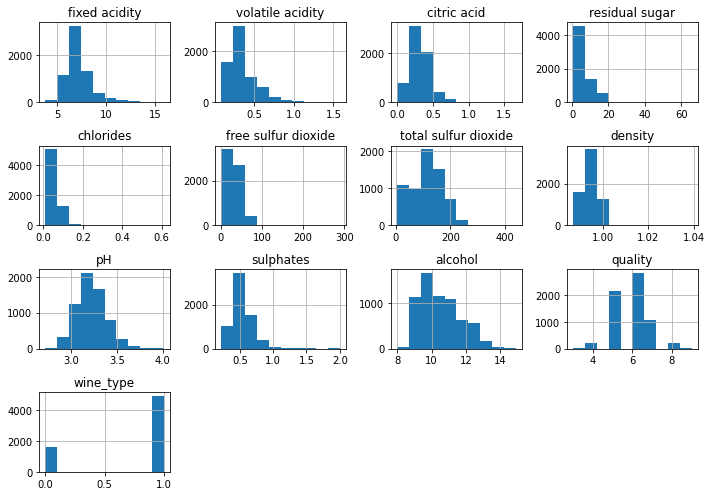

In [10]:
df.hist(figsize=(10,7))
plt.tight_layout()
plt.savefig("02-wine-histogram.png")

In [11]:
#correlation
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,-0.486740
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,-0.653036
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,0.187397
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,-0.512678
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,0.471644
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,0.700357
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,-0.390645
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,-0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,-0.487218


# Data Visualization

### Correlation of Variables

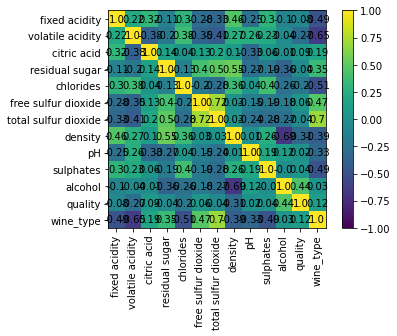

In [12]:
n_cols = len(df.columns)
corr_matrix = df.corr()
# Plot the heatmap with custom colors and annotations
plt.imshow(corr_matrix, vmin=-1\
           , vmax=1)
for i in range(n_cols):
    for j in range(n_cols):
        plt.annotate(str(round(corr_matrix.values[i][j], 2)),\
                     xy=(j, i),
                     ha='center', va='center', color='black')
plt.xticks(range(len(corr_matrix.columns)),\
           corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)),
           corr_matrix.columns)

plt.colorbar()
plt.savefig("04-wine-corr.png")

In [13]:
cor_groups = [["wine_type", "volatile acidity", "total sulfur dioxide"], ["alcohol", "density"], ["total sulfur dioxide", "free sulfur dioxide"]]
i = 1
print("Correlation of each feature in the group to the output\n")
for group in cor_groups:
    print(f"group: {i}")
    for ele in group:
        print(f"{ele}: ", end="")
        print (abs(round(list(set(df[["quality", ele]].corr().min().tolist()))[0],2)))
    print()
    i += 1

Correlation of each feature in the group to the output

group: 1
wine_type: 0.12
volatile acidity: 0.27
total sulfur dioxide: 0.04

group: 2
alcohol: 0.44
density: 0.31

group: 3
total sulfur dioxide: 0.04
free sulfur dioxide: 0.06



Based on the correlation of features from the above

The following features will be dropped
- Wine type
- total sulfur dioxide
- Density

Only the feature with the most correlation with the output is selected in each group of highly correlated features

This feature selection method is helpful in reducing highly correlated features from our dataset

### Distribution of wine quality

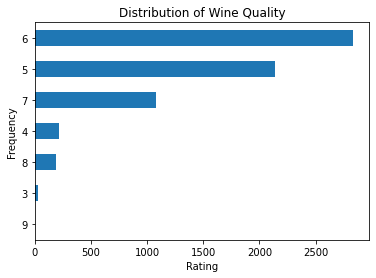

In [14]:
df_viz["quality"][::-1].value_counts(ascending=True).plot(kind='barh')
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.title("Distribution of Wine Quality")
plt.savefig("01-wine_qual_dist.png")

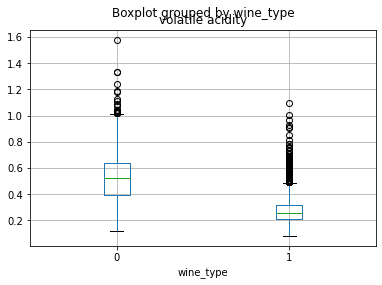

In [15]:
df_viz.boxplot("volatile acidity", by="wine_type")
plt.savefig("03-wine-by-volatile-acidity.png")

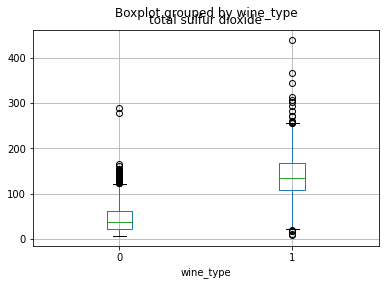

In [16]:
df_viz.boxplot("total sulfur dioxide", by="wine_type")
plt.savefig("05-wine-by-total-sulfur.png")

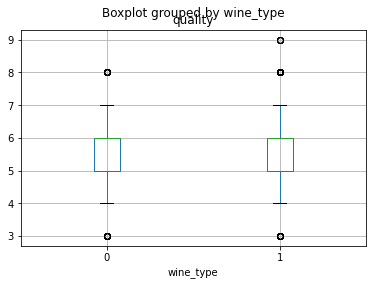

In [17]:
df_viz.boxplot("quality", by="wine_type")
plt.savefig("06-wine-by-quality.png")

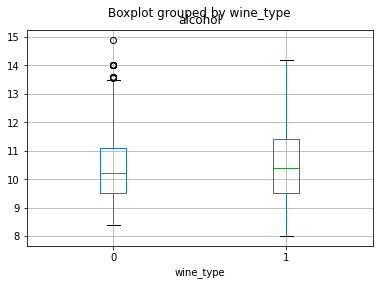

In [18]:
df_viz.boxplot("alcohol", by="wine_type")
plt.savefig("07-wine-by-alcohol.png")

# Machine Learning

## Split data into X and y components

In [19]:
y = df["quality"]
X = df.drop(columns=["quality", "total sulfur dioxide",
                     "wine_type", "density"
                    ])

## Normalize X data

In [20]:
X_norm = X/X.max()

## Train Test Split of ML data

In [21]:
X_train, X_val, y_train, y_val = train_test_split(X_norm, y)

## Building Regression Models

In [23]:
# Create a list of models and their description
models_list = [LinearRegression, SVR, KNeighborsRegressor,
              DecisionTreeRegressor, RandomForestRegressor,
              MLPRegressor]
desc = {0:"Linear Regresssion", 1:"Support Vector", 2:"KNN",
       3:"Decision Tree", 4:"Random Forest", 5:"Multilayer Perceptron"}

#Iterate through each model in the list
#Create a predictive model and evaluate them
for each in range(len(models_list)):
    print(f"Model: {desc[each]}")
    model = models_list[each]()
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    print("Training Results\n")
    print(f"MAE: {mean_absolute_error(y_train, y_train_pred)}")
    print(f"MSE: {mean_squared_error(y_train, y_train_pred)}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred))}\n")
    print("Testing Results\n")
    print(f"MAE: {mean_absolute_error(y_val, y_val_pred)}")
    print(f"MSE: {mean_squared_error(y_val, y_val_pred)}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_val, y_val_pred))}\n")

Model: Linear Regresssion
Training Results

MAE: 0.5766573569898623
MSE: 0.5498390298369403
RMSE: 0.7415113147059459

Testing Results

MAE: 0.5646438158729981
MSE: 0.5410434034521997
RMSE: 0.7355565263473636

Model: Support Vector
Training Results

MAE: 0.5560194932262775
MSE: 0.523678606507618
RMSE: 0.7236564146800731

Testing Results

MAE: 0.5475341137804965
MSE: 0.5134073758377928
RMSE: 0.7165245116796722

Model: KNN
Training Results

MAE: 0.4232758620689655
MSE: 0.331568144499179
RMSE: 0.57581954160933

Testing Results

MAE: 0.5202461538461539
MSE: 0.48898461538461535
RMSE: 0.6992743491539035

Model: Decision Tree
Training Results

MAE: 0.0
MSE: 0.0
RMSE: 0.0

Testing Results

MAE: 0.48184615384615387
MSE: 0.668923076923077
RMSE: 0.817877177162364

Model: Random Forest
Training Results

MAE: 0.16488095238095235
MSE: 0.05398571428571428
RMSE: 0.23234826077617685

Testing Results

MAE: 0.42988307692307687
MSE: 0.35875076923076926
RMSE: 0.5989580696766421

Model: Multilayer Perceptron

/home/docode/.pyenv/versions/3.6.7/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training Results

MAE: 0.5674595817114317
MSE: 0.5341700497609898
RMSE: 0.7308693794112529

Testing Results

MAE: 0.558795129819235
MSE: 0.5218185260252278
RMSE: 0.7223700755327755



## Evaluation of  Best Performing Machine Learning Model

### Wine rating Feature Importance 

In [24]:
# Random Forest
rfc = RandomForestRegressor()
rfc.fit(X_train, y_train)
y_train_pred = rfc.predict(X_train)
y_val_pred = rfc.predict(X_val)

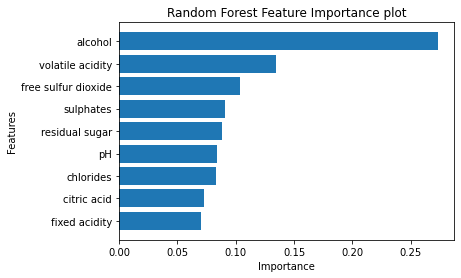

In [25]:
sorted_idx = rfc.feature_importances_.argsort()
plt.barh(X_norm.columns[sorted_idx], rfc.feature_importances_[sorted_idx])
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Random Forest Feature Importance plot")
plt.show()

### Wine quality prediction Evaluation using Random Forest

Random Forest was used because it gave the overall best rating result

In [26]:
#main_qual_all = [quality(x) for x in df["quality"]]
y_qual_val_pred = [quality(x) for x in y_train_pred ]
y_qual_val = [quality(x) for x in y_train ]

In [27]:
print(classification_report(y_qual_val, y_qual_val_pred))

              precision    recall  f1-score   support

        Good       1.00      0.63      0.77      3077
        Poor       0.61      1.00      0.76      1795

    accuracy                           0.76      4872
   macro avg       0.80      0.81      0.76      4872
weighted avg       0.86      0.76      0.77      4872

